FONTE: https://www.kaggle.com/zalando-research/fashionmnist

### Dataset
Fashion-MNIST é um conjunto de dados das imagens dos artigos de Zalando - consistindo em um conjunto de treinamento de 60.000 exemplos e um conjunto de testes de 10.000 exemplos. Cada exemplo é uma imagem em escala de cinza de 28 x 28, associada a um rótulo de 10 classes. Zalando pretende que o Fashion-MNIST sirva como substituto direto do conjunto de dados MNIST original para algoritmos de aprendizado de máquina de benchmarking. Ele compartilha o mesmo tamanho de imagem e estrutura de divisões de treinamento e teste.

O conjunto de dados MNIST original contém muitos dígitos manuscritos. Os membros da comunidade de AI / ML / Ciência de dados amam esse conjunto de dados e o usam como referência para validar seus algoritmos. De fato, o MNIST é frequentemente o primeiro grupo de dados que os pesquisadores tentam. "Se não funcionar no MNIST, não funcionará", disseram eles. "Bem, se funcionar no MNIST, ainda poderá falhar nos outros."

Zalando procura substituir o conjunto de dados MNIST original

### Conteúdo
Cada imagem tem 28 pixels de altura e 28 pixels de largura, totalizando 784 pixels no total. Cada pixel tem um único valor de pixel associado, indicando a claridade ou a escuridão desse pixel, com números mais altos significando mais escuros. Esse valor de pixel é um número inteiro entre 0 e 255. Os conjuntos de dados de treinamento e teste possuem 785 colunas. A primeira coluna consiste nos rótulos das classes (veja acima) e representa o artigo de vestuário. O restante das colunas contém os valores de pixel da imagem associada.

Para localizar um pixel na imagem, suponha que decompusemos x como x = i * 28 + j, onde i e j são números inteiros entre 0 e 27. O pixel está localizado na linha i e na coluna j de uma matriz 28 x 28 .
Por exemplo, pixel31 indica o pixel que está na quarta coluna da esquerda e a segunda linha da parte superior, como no diagrama ascii abaixo.

Cada exemplo de treinamento e teste é atribuído a um dos seguintes rótulos:

0 Camiseta / top

1 calça

2 Pulôver

3 Vestido

4 Casaco

5 Sandália

6 Camisa

7 Sapatilha

8 Bag

9 Bota no tornozelo

TL; DR

Cada linha é uma imagem separada.
A coluna 1 é o rótulo da classe.
As colunas restantes são números de pixels (784 no total).
Cada valor é a "escuridão" do pixel (1 a 255)

In [1]:
import pandas as pd

In [2]:
trainData = pd.read_csv('fashion-dataset/fashion-mnist_train.csv')

In [3]:
trainData.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
import matplotlib.pyplot as plt

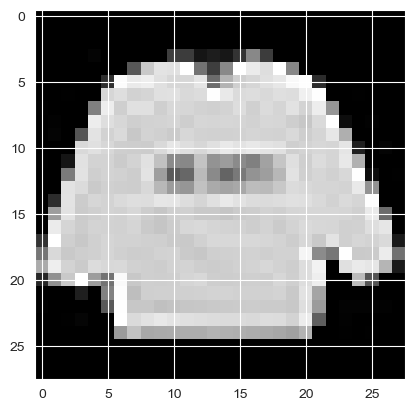

In [5]:
# Imprimindo um objeto do dataset
plt.imshow(trainData.values[0][1:].reshape(28,28), cmap='gray', interpolation='none')
plt.show()

### A atividade consiste em utilizar o KNN para classificar as imagens do fmnist

## Extract the labels from the training data and test data

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
import matplotlib.pyplot as plt

In [7]:
# Load test and training data
testData = pd.read_csv('fashion-dataset/fashion-mnist_test.csv')

# extract the labels from the data
trainLabels = trainData["label"]
testLabels = testData["label"]

print("Training data ponit: {}".format(len(trainLabels)))
print("Testing data ponit: {}".format(len(testLabels)))

Training data ponit: 60000
Testing data ponit: 10000


## Divids the training data into training and validation data

In [8]:
# split the training data into training and validation data
from sklearn.model_selection import train_test_split

(trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels,
test_size=0.1, random_state=84)

## Initialize the k value for the knn classifier and  with a list to store the accuracy for different values of k

In [11]:
kVals = range(1, 30, 5)
accuracies= []

## Loop over different values of k for the k-Nearest Neighbor classifier

In [12]:
for k in kVals:
    # train the k-Nearest Neighbor classifier with the current value of `k`
    model = KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
    model.fit(trainData, trainLabels)
    # evaluate the model and update the accuracies list
    score = model.score(valData, valLabels)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)

k=1, accuracy=65.23%
k=6, accuracy=64.72%
k=11, accuracy=63.88%
k=16, accuracy=63.82%
k=21, accuracy=63.63%
k=26, accuracy=62.70%


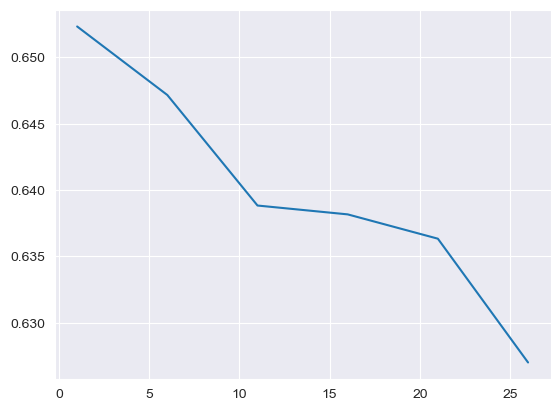

In [13]:
plt.plot(kVals, accuracies)

## Model prediction with validation data

In [14]:
valData[0:1:]

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
37379,8,0,0,0,0,0,2,3,3,0,...,0,0,0,26,0,0,0,0,0,0


In [15]:
model.predict(valData[0:1:])

array([2], dtype=int64)

## Choosing the best k value and training the model with the entire training data

In [17]:
model = KNeighborsClassifier(n_neighbors=2, metric='chebyshev')
model.fit(trainData, trainLabels)

KNeighborsClassifier(metric='chebyshev', n_neighbors=2)

In [18]:
model.fit(trainData, trainLabels)

KNeighborsClassifier(metric='chebyshev', n_neighbors=2)

## Model prediction with test data

In [19]:
y_pred = model.predict(testData)

## Model evaluation

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
print(classification_report(testLabels, y_pred, target_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']))

              precision    recall  f1-score   support

 T-shirt/top       0.47      0.86      0.61      1000
     Trouser       0.95      0.89      0.92      1000
    Pullover       0.41      0.83      0.55      1000
       Dress       0.75      0.43      0.54      1000
        Coat       0.72      0.41      0.52      1000
      Sandal       0.90      0.34      0.50      1000
       Shirt       0.51      0.37      0.43      1000
     Sneaker       0.74      0.82      0.78      1000
         Bag       0.57      0.58      0.58      1000
  Ankle boot       0.87      0.73      0.79      1000

    accuracy                           0.63     10000
   macro avg       0.69      0.63      0.62     10000
weighted avg       0.69      0.63      0.62     10000



## Confusion matrix

In [22]:
confusion_matrix(testLabels, y_pred)

array([[857,   6,  71,   6,   4,   1,  49,   1,   5,   0],
       [ 73, 888,  18,  12,   1,   0,   8,   0,   0,   0],
       [ 77,   7, 833,   9,  39,   0,  33,   0,   2,   0],
       [391,  11,  90, 426,  32,   0,  49,   0,   1,   0],
       [ 42,   5, 417,  40, 413,   0,  83,   0,   0,   0],
       [ 41,   2,  52,  25,  12, 345,  26, 241, 175,  81],
       [238,  14, 295,  17,  63,   0, 370,   0,   3,   0],
       [  4,   0,   1,   3,   0,  26,   8, 822, 108,  28],
       [ 71,   2, 214,  26,  12,   4,  86,   3, 582,   0],
       [ 18,   0,  40,   2,   1,   8,  15,  49, 140, 727]], dtype=int64)